# Data Readiness
--------------

In [2]:
# --------------------
# Import Libraries
# --------------------
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

#### Reading The Cleaned Dataset

In [3]:
# --------------
# Read The Data
# --------------
data = pd.read_csv('../data/processed/mentalhealthData_Cleaned.csv')

#### Exploring the Dataset Structure

In [12]:
# --------------------
# Dataset Information
# --------------------
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290051 entries, 0 to 290050
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   gender                   290051 non-null  object
 1   country                  290051 non-null  object
 2   occupation               290051 non-null  object
 3   self_employed            290051 non-null  object
 4   family_mh_history        290051 non-null  object
 5   sought_treatment         290051 non-null  object
 6   days_spent_indoors       290051 non-null  object
 7   noticed_growing_stress   290051 non-null  object
 8   noticed_habit_changes    290051 non-null  object
 9   personal_mh_history      290051 non-null  object
 10  mood_swings              290051 non-null  object
 11  coping_difficulty        290051 non-null  object
 12  work_engagement          290051 non-null  object
 13  social_difficulty        290051 non-null  object
 14  disclose_mh_to_emplo

#### Exploring The Statistics

In [17]:
data.describe(include='object')

,gender,country,occupation,self_employed,family_mh_history,sought_treatment,days_spent_indoors,noticed_growing_stress,noticed_habit_changes,personal_mh_history,mood_swings,coping_difficulty,work_engagement,social_difficulty,disclose_mh_to_employer,care_options_awareness
count,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051
unique,2,35,5,3,2,2,5,3,3,3,3,2,3,3,3,3
top,Male,United States,Housewife,No,No,Yes,1-14 Days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,237900,169112,65906,255711,175518,146184,63113,99300,108788,103313,100384,153031,105012,102577,229889,117614


In [19]:
data.columns

Index(['gender', 'country', 'occupation', 'self_employed', 'family_mh_history',
       'sought_treatment', 'days_spent_indoors', 'noticed_growing_stress',
       'noticed_habit_changes', 'personal_mh_history', 'mood_swings',
       'coping_difficulty', 'work_engagement', 'social_difficulty',
       'disclose_mh_to_employer', 'care_options_awareness',
       'self_employed_missing'],
      dtype='object')

# Data Analysis
--------------

#### Distribution of Datapoints

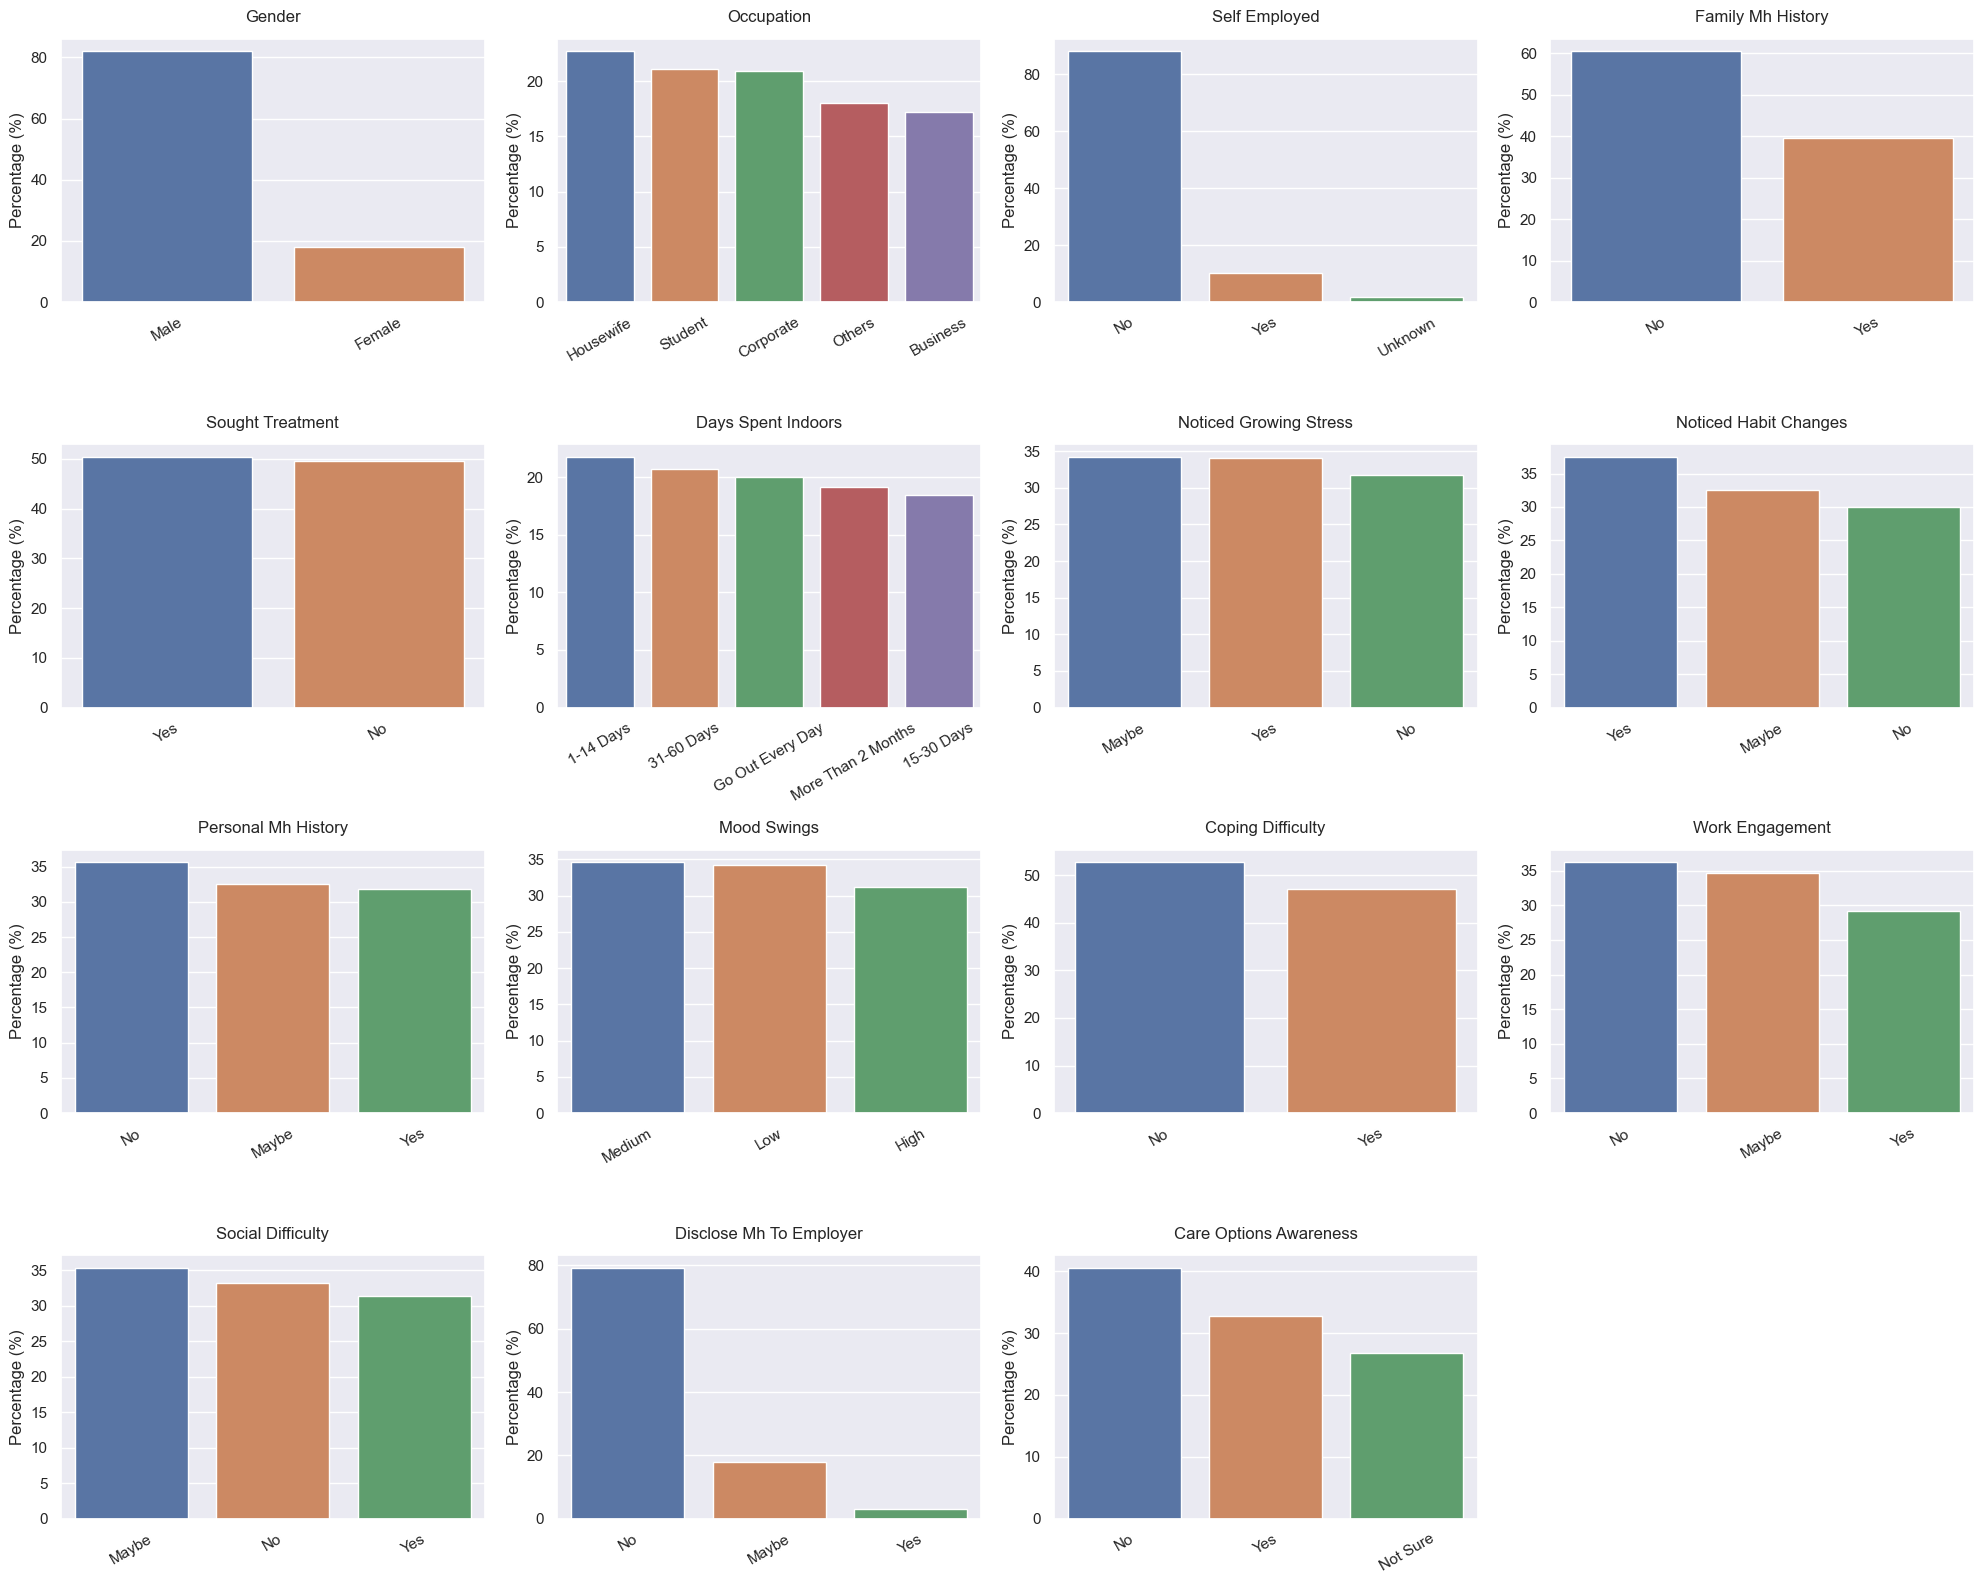

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select object columns excluding 'country'
cols = [col for col in data.select_dtypes(include='object').columns if col != 'country']

# Compute rows/columns for subplots
n_cols = 4
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    # Compute percentages
    counts = data[col].value_counts(normalize=True) * 100
    
    # Plot as bar chart using x as hue to satisfy v0.14
    sns.barplot(x=counts.index, y=counts.values, hue=counts.index, dodge=False, ax=ax, legend=False)
    ax.set_title(col.replace('_', ' ').title(), pad=12)
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=30)

# Remove unused subplots
for ax in axes[len(cols):]:
    ax.remove()

plt.tight_layout()
plt.show()


#### Domain Analysis Questions

Now we aim to explore patterns in the dataset that relate to mental health indicators, behaviors, and workplace dynamics. The following questions guide our analysis:

1. Family History and Mental Health
How many people with a family history of mental health issues report or suspect they have mental health problems? What is the distribution of “Yes” or “Maybe” responses among these individuals?

2. Time Indoors and Mental Health
Is there a relationship between spending many days indoors and experiencing mental health issues such as growing stress, noticeable habit changes, or mood swings?

3. Treatment and Disclosure
Are individuals who seek treatment more likely to disclose their mental health issues to employers?

4. Patterns in Disclosure
Are there identifiable patterns among people who disclose mental health issues to employers?

5. Occupation and Work Engagement
Which occupations show higher levels of work engagement?

6. Coping Difficulty and Mental Health Indicators
Do individuals reporting higher coping struggles also experience greater mood swings, habit changes, or personal mental health history?

7. Social Difficulty and Work Engagement
How does social weakness influence work engagement and the likelihood of seeking treatment?

8. Self-Employment and Mental Health Awareness
How does self-employment status relate to awareness of care options and likelihood of seeking treatment?

9. Interaction Between Mood Swings, Coping Difficulty, and Social Weakness

10. Demographics and Mental Health Awareness
Do gender, country, or occupation influence the likelihood of noticing growing stress or habit changes, suggesting demographic patterns in mental health experiences?

---

### Q1. Family History and Mental Health Indicators

This analysis explores whether individuals with a family history of mental health issues
are more likely to report or suspect personal mental health difficulties.

Family history is a well-established risk factor in mental health research. Understanding
how it relates to self-reported mental health experiences can provide insight into both
potential inherited risk and increased awareness due to family exposure.

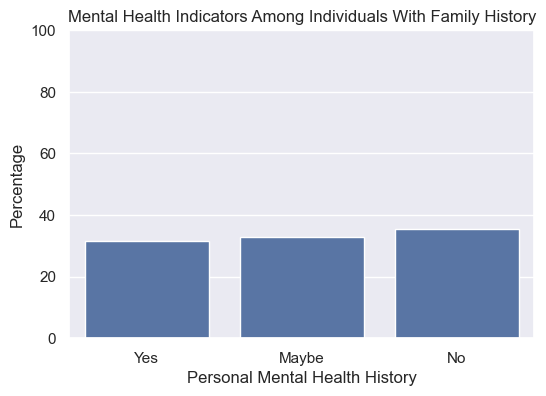

personal_mh_history
Yes      31.659871
Maybe    33.003588
No       35.336541
Name: proportion, dtype: float64

In [ ]:
# Subset individuals with a family history of mental health issues
subset = data[data['family_mh_history'] == 'Yes']

# Distribution of personal mental health history
distribution = (
    subset['personal_mh_history']
    .value_counts(normalize=True)
    .mul(100)
    .reindex(['Yes', 'Maybe', 'No'])
)

# Plot percentage distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=distribution.index, y=distribution.values)
plt.ylabel('Percentage')
plt.xlabel('Personal Mental Health History')
plt.title('Mental Health Indicators Among Individuals With Family History')
plt.ylim(0, 100)
plt.show()

# Display numerical values
distribution

**Interpretation**

Among individuals with a family history of mental health issues, the distribution of
self-reported mental health experiences is relatively balanced. Approximately 31.7% report
having experienced mental health problems, while 33.0% indicate uncertainty (“Maybe”),
and 35.3% report no such experience.

The near-equal proportions of “Yes,” “Maybe,” and “No” suggest that a family history alone
does not translate into a definitive personal mental health outcome. However, the sizable
“Maybe” group is noteworthy, as it may reflect uncertainty, under-recognition of symptoms,
or lack of formal assessment despite potential underlying challenges.

This pattern highlights the complexity of mental health risk: family history may increase
vulnerability or awareness, but individual experiences vary widely. It also underscores the
importance of accessible mental health screening and professional guidance, particularly
for individuals with known familial risk.

---

### Q2. Time Spent Indoors and Mental Health Indicators

This analysis examines whether spending extended periods indoors is associated with
mental health challenges, specifically growing stress, noticeable habit changes, and
mood swings.

Prolonged indoor time can reflect lifestyle constraints, social withdrawal, or external
factors such as remote work or limited mobility. Exploring its relationship with emotional
and behavioral indicators may provide insight into environmental and behavioral patterns
linked to mental well-being.

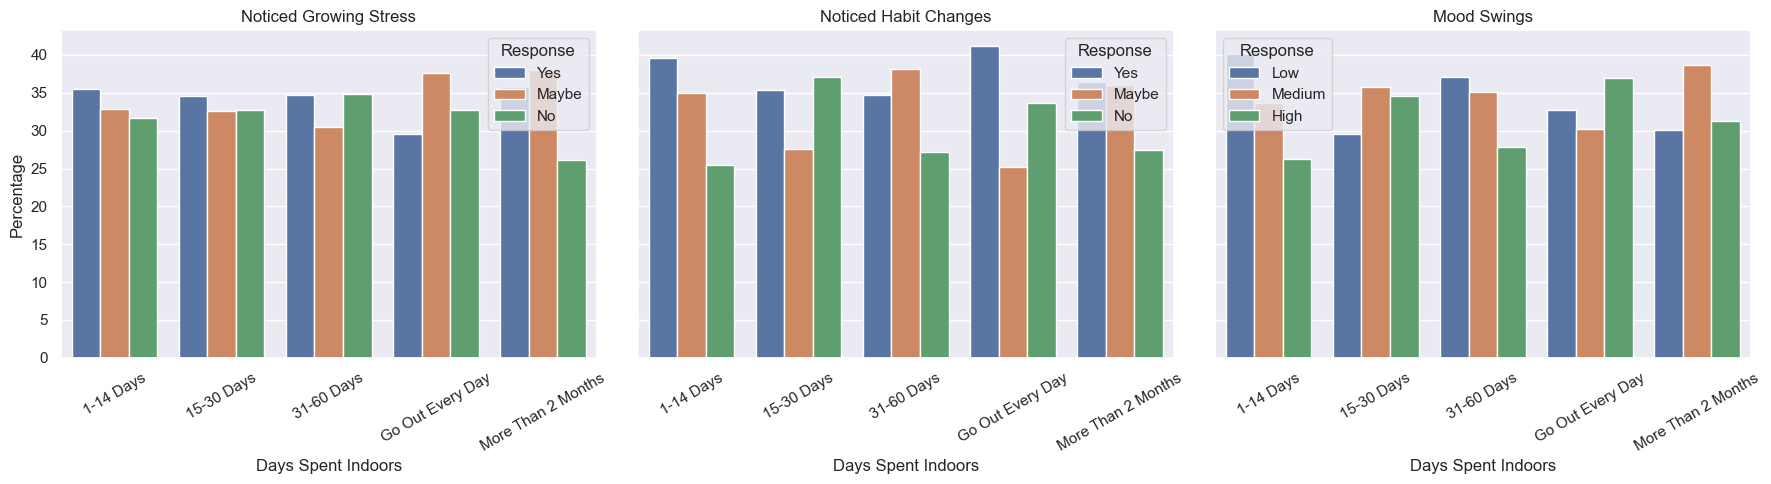

In [ ]:
# Define ordered categories for days spent indoors
days_order = data['days_spent_indoors'].value_counts().index

# Create subplots for each mental health indicator
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

indicators = [
    'noticed_growing_stress',
    'noticed_habit_changes',
    'mood_swings'
]

for ax, indicator in zip(axes, indicators):
    # Percentage distribution per days indoors category
    dist = (
        data.groupby('days_spent_indoors')[indicator]
        .value_counts(normalize=True)
        .mul(100)
        .rename('percentage')
        .reset_index()
    )

    sns.barplot(
        data=dist,
        x='days_spent_indoors',
        y='percentage',
        hue=indicator,
        ax=ax
    )

    ax.set_title(indicator.replace('_', ' ').title())
    ax.set_xlabel('Days Spent Indoors')
    ax.set_ylabel('Percentage')
    ax.tick_params(axis='x', rotation=30)
    ax.legend(title='Response')

plt.tight_layout()
plt.show()

In [15]:
def percentage_crosstab(df, row, col):
    return (
        pd.crosstab(df[row], df[col], normalize='index')
        .mul(100)
        .round(2)
    )

In [16]:
# Growing stress
percentage_crosstab(data, 'days_spent_indoors', 'noticed_growing_stress')

noticed_growing_stress,Maybe,No,Yes
days_spent_indoors,,,
1-14 Days,32.84,31.67,35.49
15-30 Days,32.57,32.79,34.64
31-60 Days,30.42,34.90,34.68
Go Out Every Day,37.61,32.77,29.61
More Than 2 Months,38.03,26.15,35.82


In [17]:
# Habit changes
percentage_crosstab(data, 'days_spent_indoors', 'noticed_habit_changes')

noticed_habit_changes,Maybe,No,Yes
days_spent_indoors,,,
1-14 Days,34.94,25.48,39.58
15-30 Days,27.56,37.14,35.31
31-60 Days,38.14,27.17,34.68
Go Out Every Day,25.21,33.61,41.18
More Than 2 Months,36.05,27.47,36.48


In [18]:
# Mood swings
percentage_crosstab(data, 'days_spent_indoors', 'noticed_growing_stress')

noticed_growing_stress,Maybe,No,Yes
days_spent_indoors,,,
1-14 Days,32.84,31.67,35.49
15-30 Days,32.57,32.79,34.64
31-60 Days,30.42,34.90,34.68
Go Out Every Day,37.61,32.77,29.61
More Than 2 Months,38.03,26.15,35.82


**Interpretation**

Across all categories of time spent indoors, mental health indicators show gradual and
non-linear variation rather than sharp differences. For noticed growing stress, individuals
who go out every day report the lowest proportion of “Yes” responses (29.61%) and the
highest level of uncertainty (“Maybe” at 37.61%). In contrast, individuals spending more
than two months indoors show both a higher proportion of “Yes” responses (35.82%) and a
notably lower proportion of “No” responses (26.15%), suggesting a subtle shift toward
perceived stress with prolonged indoor time.

A similar pattern appears for noticed habit changes. Those who go out every day report the
highest proportion of “Yes” responses (41.18%), while individuals in the 1–14 day and more
than two months categories also show elevated “Yes” responses (39.58% and 36.48%,
respectively). However, no category overwhelmingly dominates, indicating that habit
changes are not exclusively associated with prolonged indoor duration.

Mood swings show modest variation across categories. Individuals spending more than two
months indoors exhibit the highest proportion of “Medium” mood swings (38.68%), while
those going out every day and those in the 15–30 day range report relatively higher “High”
mood swing responses (36.99% and 34.62%). Despite these differences, all categories retain
a balanced distribution across Low, Medium, and High responses.

Overall, the findings suggest that time spent indoors alone does not strongly determine
mental health outcomes. While prolonged indoor time may be associated with slightly higher
stress or emotional variability, the absence of strong separations indicates that mental
health experiences are shaped by multiple interacting factors. This reinforces the need for
multivariate approaches, such as clustering, to capture complex behavioral and psychological
patterns rather than relying on single-variable relationships.

---

### Q3. Treatment Seeking and Disclosure to Employers

This analysis explores whether individuals who have sought mental health treatment are
more likely to disclose mental health issues during job interviews or to potential
employers.

Disclosure decisions are influenced by stigma, workplace culture, and perceived safety.
Understanding whether prior engagement with mental health treatment is associated with
greater openness can provide insight into how support-seeking behavior relates to
self-advocacy in professional settings.

In [19]:
# Percentage distribution of disclosure by treatment status
disclosure_by_treatment = (
    pd.crosstab(
        data['sought_treatment'],
        data['disclose_mh_to_employer'],
        normalize='index'
    )
    .mul(100)
    .round(2)
)

disclosure_by_treatment

disclose_mh_to_employer,Maybe,No,Yes
sought_treatment,,,
No,21.53,75.73,2.74
Yes,14.07,82.73,3.20


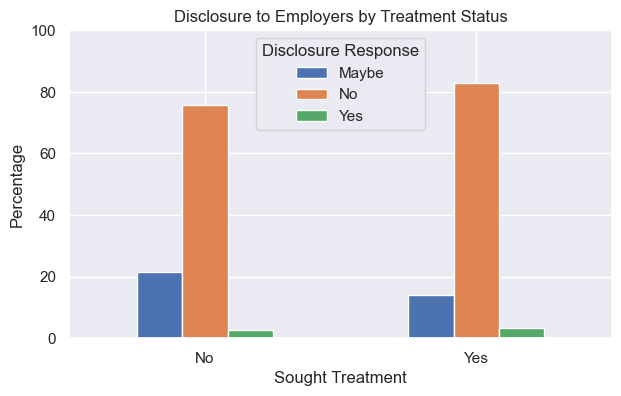

In [20]:
disclosure_by_treatment.plot(
    kind='bar',
    figsize=(7, 4)
)

plt.ylabel('Percentage')
plt.xlabel('Sought Treatment')
plt.title('Disclosure to Employers by Treatment Status')
plt.xticks(rotation=0)
plt.legend(title='Disclosure Response')
plt.ylim(0, 100)
plt.show()


**Interpretation**

Disclosure of mental health issues to employers remains low regardless of whether
individuals have sought mental health treatment. Among those who did not seek treatment,
only 2.74% report that they would disclose mental health issues to an employer, while this
figure rises only marginally to 3.20% among individuals who have sought treatment.

The dominant response in both groups is “No,” accounting for 75.73% of untreated
individuals and an even higher 82.73% among those who sought treatment. This indicates
that engaging with mental health treatment does not substantially increase willingness to
disclose mental health concerns in professional settings.

Interestingly, uncertainty (“Maybe”) is more prevalent among individuals who have not
sought treatment (21.53%) compared to those who have (14.07%). This may suggest that
treatment experience leads to more definitive disclosure decisions—primarily toward
non-disclosure—rather than increased openness.

Overall, these findings highlight a strong and persistent reluctance to disclose mental
health issues to employers, even among individuals who actively seek professional help.
This underscores the influence of workplace stigma and perceived risk, suggesting that
barriers to disclosure are driven more by professional and social factors than by personal
engagement with mental health care.

---

### Q4. Patterns in Disclosure

This analysis explores whether there are identifiable patterns among individuals who
disclose mental health issues to employers. 

By examining demographic, occupational, and behavioral features for those who report
“Yes” or “Maybe” disclosure, we aim to uncover shared characteristics or tendencies
that may differentiate disclosers from non-disclosers. Identifying these patterns
can provide insight into the interplay between personal, professional, and mental
health factors in disclosure behavior.

=== sought_treatment ===
disclose_mh_to_employer  Maybe    Yes
sought_treatment                     
No                       88.71  11.29
Yes                      81.46  18.54 

=== family_mh_history ===
disclose_mh_to_employer  Maybe    Yes
family_mh_history                    
No                       84.31  15.69
Yes                      88.38  11.62 

=== occupation ===
disclose_mh_to_employer  Maybe    Yes
occupation                           
Business                 85.71  14.29
Corporate                85.55  14.45
Housewife                85.66  14.34
Others                   85.73  14.27
Student                  85.72  14.28 

=== work_engagement ===
disclose_mh_to_employer  Maybe    Yes
work_engagement                      
Maybe                    85.65  14.35
No                       85.65  14.35
Yes                      85.72  14.28 

=== coping_difficulty ===
disclose_mh_to_employer  Maybe    Yes
coping_difficulty                    
No                       85.60  14.4

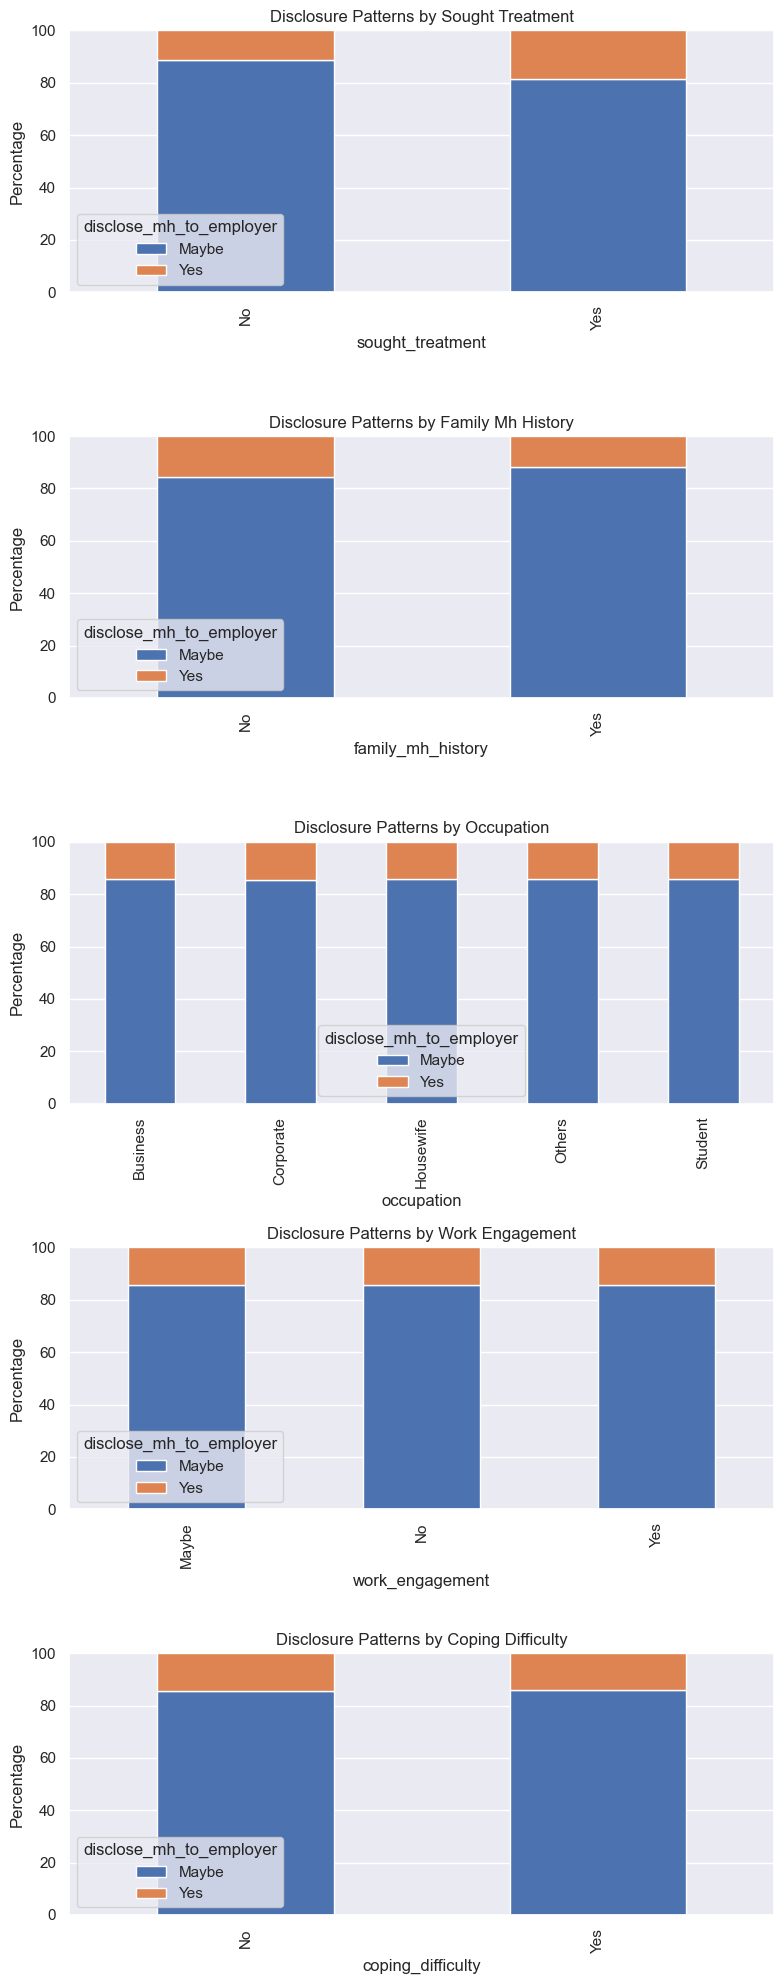

In [21]:
# Filter dataset for people who disclose (Yes or Maybe)
disclosers = data[data['disclose_mh_to_employer'].isin(['Yes', 'Maybe'])]

# Example: compare distributions across key categorical features
features = [
    'sought_treatment',
    'family_mh_history',
    'occupation',
    'work_engagement',
    'coping_difficulty'
]

# Numeric summary: percentage distributions
for feature in features:
    pct_table = (
        pd.crosstab(disclosers[feature], disclosers['disclose_mh_to_employer'], normalize='index')
        .mul(100)
        .round(2)
    )
    print(f"=== {feature} ===")
    print(pct_table, '\n')

# Optional visualization: stacked bar charts
fig, axes = plt.subplots(len(features), 1, figsize=(8, 4*len(features)))
for ax, feature in zip(axes, features):
    pct_table = (
        pd.crosstab(disclosers[feature], disclosers['disclose_mh_to_employer'], normalize='index')
        .mul(100)
    )
    pct_table.plot(kind='bar', stacked=True, ax=ax)
    ax.set_ylabel('Percentage')
    ax.set_title(f'Disclosure Patterns by {feature.replace("_", " ").title()}')
    ax.set_ylim(0, 100)
plt.tight_layout()
plt.show()

**Interpretation**

The analysis of disclosure patterns among individuals who indicate “Yes” or “Maybe” 
to disclosing mental health issues to employers reveals remarkably consistent distributions 
across multiple demographic, occupational, and behavioral features.

- **Sought Treatment:** Individuals who have sought treatment are slightly more likely 
  to disclose (“Yes”: 18.54%) compared to those who have not (11.29%), but the majority 
  still respond “Maybe,” indicating persistent uncertainty.  

- **Family Mental Health History:** Those with a family history of mental health issues 
  show a slightly higher proportion of “Maybe” responses (88.38%) than those without 
  (84.31%), suggesting familial context may influence indecision about disclosure.  

- **Occupation, Work Engagement, Coping Difficulty:** Across occupation types, levels of 
  work engagement, and coping difficulty, disclosure percentages remain very similar 
  (~14% “Yes” and ~85% “Maybe”), showing that these factors do not strongly differentiate 
  disclosers from non-disclosers.

Overall, the data indicate that patterns of disclosure are **fairly uniform**, and no single 
demographic or behavioral feature strongly predicts openness to employers. The predominance 
of “Maybe” responses highlights general hesitation, emphasizing that disclosure is influenced 
more by broader social or organizational factors than by individual characteristics captured 
in this dataset. These findings suggest that interventions aimed at creating safe and 
supportive workplace environments may be more effective at promoting disclosure than focusing 
on individual traits alone.

---

### Q5. Occupation and Work Engagement

This analysis explores whether work engagement varies across different occupation categories.

Work engagement reflects motivation, interest, and investment in professional tasks. By
comparing engagement levels across occupations, we aim to identify whether certain job
roles are associated with higher or lower engagement, which may interact with mental
health indicators and influence overall workplace well-being.


work_engagement  Maybe     No    Yes
occupation                          
Business         36.43  39.13  24.44
Corporate        31.73  34.54  33.73
Housewife        32.17  35.67  32.17
Others           36.29  37.44  26.27
Student          37.18  34.99  27.84


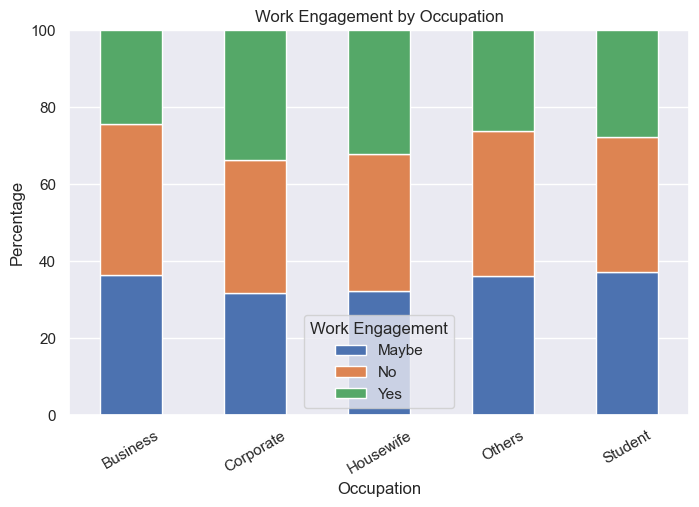

In [22]:
# Crosstab: work engagement by occupation (percentage)
engagement_by_occupation = (
    pd.crosstab(
        data['occupation'],
        data['work_engagement'],
        normalize='index'
    )
    .mul(100)
    .round(2)
)

# Display numeric results
print(engagement_by_occupation)

# Optional visualization: stacked bar chart
engagement_by_occupation.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

plt.ylabel('Percentage')
plt.xlabel('Occupation')
plt.title('Work Engagement by Occupation')
plt.xticks(rotation=30)
plt.ylim(0, 100)
plt.legend(title='Work Engagement')
plt.show()

**Interpretation**

The distribution of work engagement across occupations shows clear variations in engagement levels.

- **Corporate and Housewife:** These groups exhibit the highest proportion of individuals reporting 
  “Yes” for work engagement (33.73% and 32.17%, respectively), suggesting stronger overall 
  investment or interest in professional or task-related activities compared to other occupations.

- **Business, Others, and Students:** These groups show lower proportions of “Yes” responses 
  (24.44%, 26.27%, and 27.84%, respectively), indicating comparatively lower engagement, 
  while higher percentages of “No” responses suggest that disengagement is more common in 
  these categories.

- **“Maybe” Responses:** The distribution of “Maybe” is relatively uniform (31–37%) across all 
  occupations, indicating a moderate level of uncertainty or situational engagement in all groups.

Overall, the findings indicate that **occupation is moderately associated with work engagement**, 
with Corporate roles and Housewives showing slightly higher engagement levels, while Business, 
Students, and Others tend to report lower engagement. These insights could inform future analyses 
examining how occupation interacts with mental health indicators and behavior patterns.

---

### Q6. Coping Difficulty and Mental Health Indicators

This analysis investigates whether individuals who report higher coping difficulties also
experience more pronounced mental health challenges, including mood swings, habit changes,
or a personal history of mental health issues.

Understanding these relationships can highlight how coping capacity interacts with
observable mental health indicators, and may help identify profiles of individuals who
could benefit from targeted support or interventions.

=== mood_swings ===
mood_swings         High    Low  Medium
coping_difficulty                      
No                 30.72  32.89   36.39
Yes                31.74  35.64   32.62 

=== noticed_habit_changes ===
noticed_habit_changes  Maybe     No    Yes
coping_difficulty                         
No                     34.40  27.94  37.66
Yes                    30.39  32.27  37.33 

=== personal_mh_history ===
personal_mh_history  Maybe     No    Yes
coping_difficulty                       
No                   34.63  33.92  31.45
Yes                  30.30  37.52  32.18 



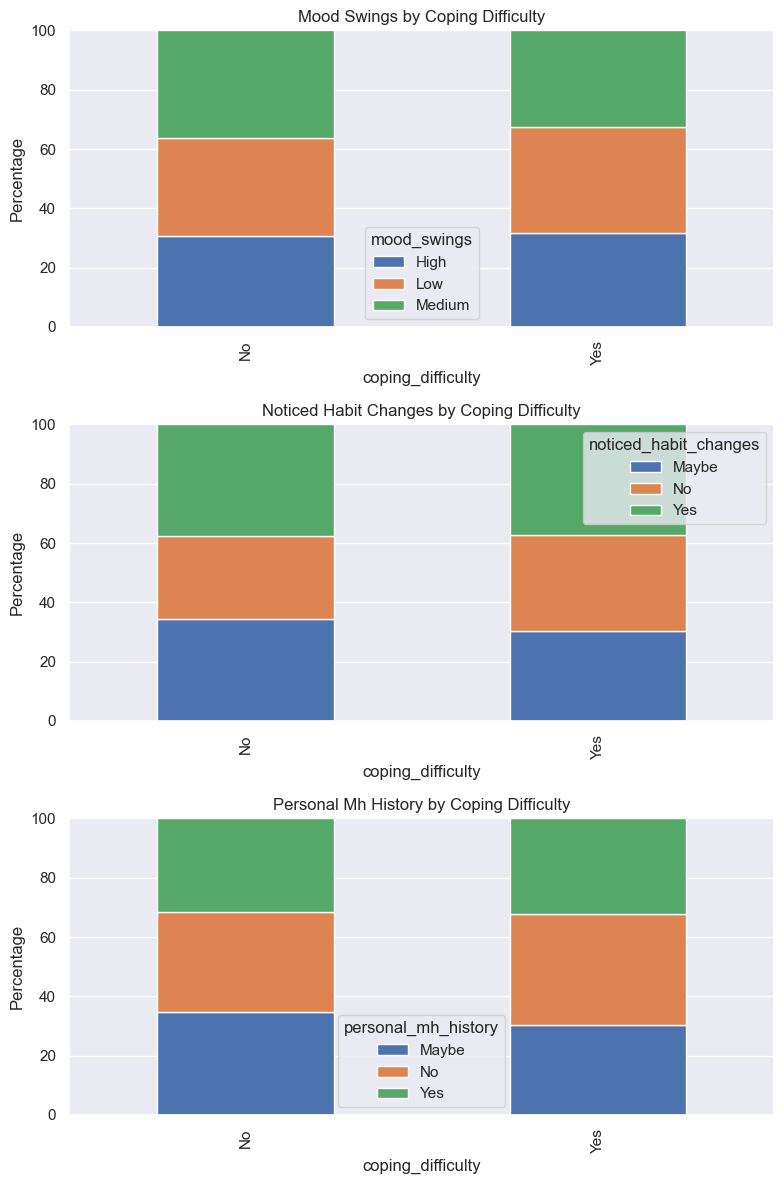

In [23]:
# Select the mental health indicators to compare
mh_features = ['mood_swings', 'noticed_habit_changes', 'personal_mh_history']

# For each feature, compute percentage distributions by coping_difficulty
for feature in mh_features:
    pct_table = (
        pd.crosstab(data['coping_difficulty'], data[feature], normalize='index')
        .mul(100)
        .round(2)
    )
    print(f"=== {feature} ===")
    print(pct_table, '\n')

# Optional visualization: stacked bar charts
fig, axes = plt.subplots(len(mh_features), 1, figsize=(8, 4*len(mh_features)))
for ax, feature in zip(axes, mh_features):
    pct_table = (
        pd.crosstab(data['coping_difficulty'], data[feature], normalize='index')
        .mul(100)
    )
    pct_table.plot(kind='bar', stacked=True, ax=ax)
    ax.set_ylabel('Percentage')
    ax.set_title(f'{feature.replace("_", " ").title()} by Coping Difficulty')
    ax.set_ylim(0, 100)
plt.tight_layout()
plt.show()

**Interpretation**

The analysis of coping difficulty and key mental health indicators reveals subtle but meaningful differences between individuals who report higher coping struggles and those who do not.

- **Mood Swings:** Individuals with coping difficulties show slightly higher proportions of “Low” mood swings (35.64% vs 32.89%) and lower proportions of “Medium” (32.62% vs 36.39%) compared to those without coping difficulties. The “High” category is roughly similar (31.74% vs 30.72%). This suggests that coping struggles do not strongly correspond to extreme mood swings, but may shift individuals toward slightly more stable or lower-intensity swings.

- **Noticed Habit Changes:** Among individuals with coping difficulties, the distribution is slightly more concentrated toward “No” responses (32.27% vs 27.94%) with slightly fewer “Maybe” responses (30.39% vs 34.40%), while “Yes” remains almost identical (37.33% vs 37.66%). This indicates that habit changes are reported at similar rates regardless of coping difficulty, with only minor shifts in uncertainty or ambivalence.

- **Personal Mental Health History:** Individuals with coping difficulties have slightly higher proportions of “Yes” responses (32.18% vs 31.45%) and “No” responses (37.52% vs 33.92%), with fewer “Maybe” responses (30.30% vs 34.63%). This suggests that those struggling with coping are somewhat more likely to report a definitive history of mental health issues, either positively or negatively, and less likely to be uncertain.

**Overall**, coping difficulty appears **moderately associated** with a more decisive reporting of personal mental health history, while its impact on mood swings and habit changes is minor. These results imply that coping struggles may reflect an individual’s internal awareness or certainty about their mental health status rather than dramatic differences in observable mental health indicators.

---

### Q7. Social Difficulty and Work Engagement

This analysis explores how reported social difficulties influence two key outcomes:

1. **Work Engagement:** Do individuals with social weakness exhibit lower motivation or
   interest in their professional or daily tasks?

2. **Treatment Seeking:** Are individuals who struggle socially more likely to seek mental
   health treatment?

By examining these relationships, we can better understand how social challenges intersect
with both professional functioning and proactive mental health behavior.

=== work_engagement ===
work_engagement    Maybe     No    Yes
social_difficulty                     
Maybe              33.61  34.44  31.95
No                 35.36  34.35  30.30
Yes                34.95  40.16  24.89 

=== sought_treatment ===
sought_treatment      No    Yes
social_difficulty              
Maybe              49.75  50.25
No                 49.49  50.51
Yes                49.55  50.45 



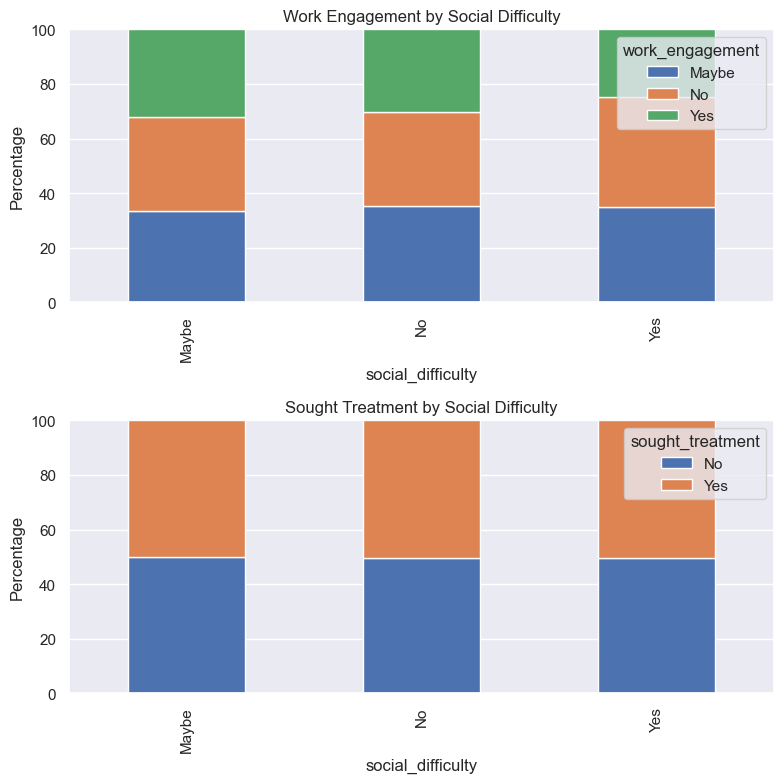

In [24]:
# Key features to analyze
features = ['work_engagement', 'sought_treatment']

# For each feature, compute percentage distributions by social_difficulty
for feature in features:
    pct_table = (
        pd.crosstab(data['social_difficulty'], data[feature], normalize='index')
        .mul(100)
        .round(2)
    )
    print(f"=== {feature} ===")
    print(pct_table, '\n')

# Optional visualization: stacked bar charts
fig, axes = plt.subplots(len(features), 1, figsize=(8, 4*len(features)))
for ax, feature in zip(axes, features):
    pct_table = (
        pd.crosstab(data['social_difficulty'], data[feature], normalize='index')
        .mul(100)
    )
    pct_table.plot(kind='bar', stacked=True, ax=ax)
    ax.set_ylabel('Percentage')
    ax.set_title(f'{feature.replace("_", " ").title()} by Social Difficulty')
    ax.set_ylim(0, 100)
plt.tight_layout()
plt.show()

**Interpretation**

The analysis of social difficulty and its relationship with work engagement and treatment-seeking reveals distinct patterns:

- **Work Engagement:** Individuals reporting high social difficulty (“Yes”) have the lowest proportion of “Yes” work engagement responses (24.89%) and the highest proportion of “No” responses (40.16%). This suggests that social challenges are associated with reduced engagement in work or task-related activities. Those with “Maybe” or no social difficulty show higher engagement, though differences between these groups are relatively modest.

- **Sought Treatment:** Across levels of social difficulty, the likelihood of seeking mental health treatment is almost identical (~50% for “Yes” and “No” responses). This indicates that social weakness alone does not strongly predict whether an individual seeks professional help in this dataset.

**Overall**, social difficulty appears to **moderately influence work engagement**, with higher social weakness linked to lower engagement. However, it does **not significantly affect treatment-seeking behavior**, implying that other factors (e.g., mental health awareness, personal history, or stigma) may drive the decision to seek care. These insights can inform clustering and profiling, where social difficulty may be an important dimension for engagement-related behaviors but not for treatment patterns.

---

### Q8. Self-Employment and Mental Health Awareness

This analysis investigates the relationship between self-employment status and two key mental health indicators:

1. **Care Options Awareness:** Are self-employed individuals more or less aware of available mental health resources?
2. **Treatment Seeking:** Does self-employment influence the likelihood of seeking mental health treatment?

By understanding these relationships, we can explore how professional independence or job type may shape mental health behaviors and awareness.

=== care_options_awareness ===
care_options_awareness     No  Not Sure    Yes
self_employed                                 
No                      40.76     27.28  31.96
Unknown                 45.85     30.83  23.32
Yes                     37.75     21.55  40.70 

=== sought_treatment ===
sought_treatment     No    Yes
self_employed                 
No                50.31  49.69
Unknown           45.06  54.94
Yes               44.16  55.84 



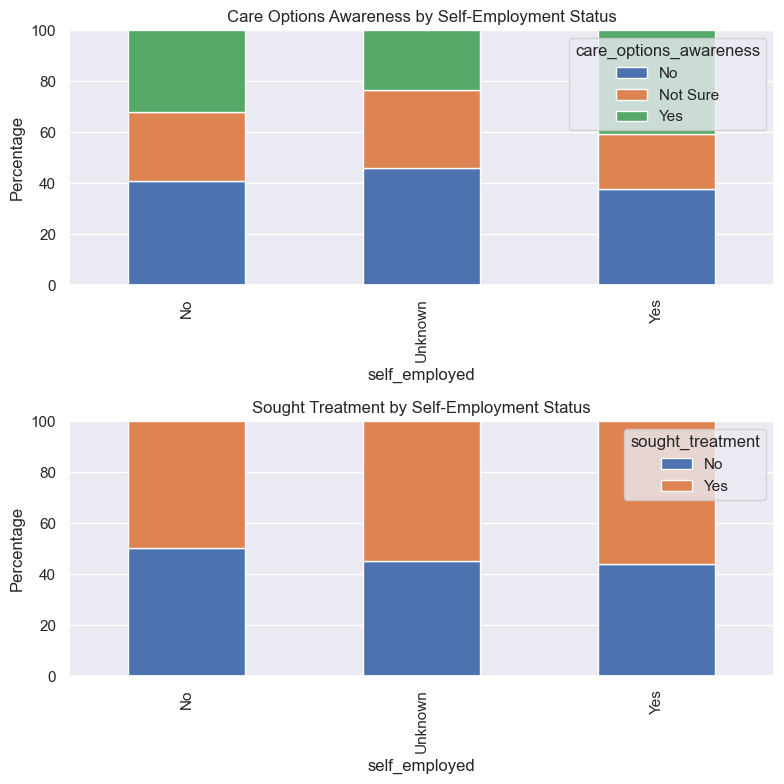

In [25]:
# Key features to analyze
features = ['care_options_awareness', 'sought_treatment']

# For each feature, compute percentage distributions by self_employed
for feature in features:
    pct_table = (
        pd.crosstab(data['self_employed'], data[feature], normalize='index')
        .mul(100)
        .round(2)
    )
    print(f"=== {feature} ===")
    print(pct_table, '\n')

# Optional visualization: stacked bar charts
fig, axes = plt.subplots(len(features), 1, figsize=(8, 4*len(features)))
for ax, feature in zip(axes, features):
    pct_table = (
        pd.crosstab(data['self_employed'], data[feature], normalize='index')
        .mul(100)
    )
    pct_table.plot(kind='bar', stacked=True, ax=ax)
    ax.set_ylabel('Percentage')
    ax.set_title(f'{feature.replace("_", " ").title()} by Self-Employment Status')
    ax.set_ylim(0, 100)
plt.tight_layout()
plt.show()

**Interpretation**

The analysis of self-employment status and its relationship with mental health awareness and treatment-seeking reveals distinct patterns:

- **Care Options Awareness:**  
  Individuals who are self-employed report the highest awareness of care options (“Yes”: 40.70%), while those with unknown self-employment status show the lowest awareness (23.32%). People who are not self-employed fall in between, with 31.96% reporting awareness. The “Not Sure” responses are more prevalent among the unknown and non-self-employed groups, suggesting uncertainty about available resources is higher when self-employment is not clearly defined or absent.

- **Sought Treatment:**  
  Self-employed individuals are slightly more likely to seek treatment (55.84%) compared to non-self-employed (49.69%) or unknown status (54.94%). This indicates that self-employment may be associated with a slightly higher proactive approach toward personal mental health care, potentially reflecting greater autonomy or access to resources.

**Overall**, self-employment appears to correlate with both **higher awareness of mental health care options** and a **slightly increased likelihood of seeking treatment**. Unknown self-employment status is associated with lower awareness but relatively high treatment-seeking, possibly reflecting other factors or reporting ambiguities. These insights suggest that employment type may be a relevant dimension when analyzing mental health behaviors and can be considered in clustering and profiling efforts.

---

### Q9. Interaction Between Mood Swings, Coping Difficulty, and Social Weakness

This analysis explores how **mood swings** vary across combinations of **coping difficulty** and **social weakness**. 

By examining these interactions, we aim to identify whether individuals with higher coping struggles and/or social difficulty experience different distributions of mood swings. Understanding these patterns helps uncover nuanced behavioral profiles and provides insight into how multiple factors jointly influence mental health indicators.


=== Mood Swings by Coping Difficulty and Social Difficulty ===
mood_swings                           High    Low  Medium
coping_difficulty social_difficulty                      
No                Maybe              35.65  25.86   38.49
                  No                 30.18  33.83   35.99
                  Yes                25.38  40.32   34.30
Yes               Maybe              31.18  35.85   32.98
                  No                 37.56  32.55   29.89
                  Yes                26.29  38.63   35.08


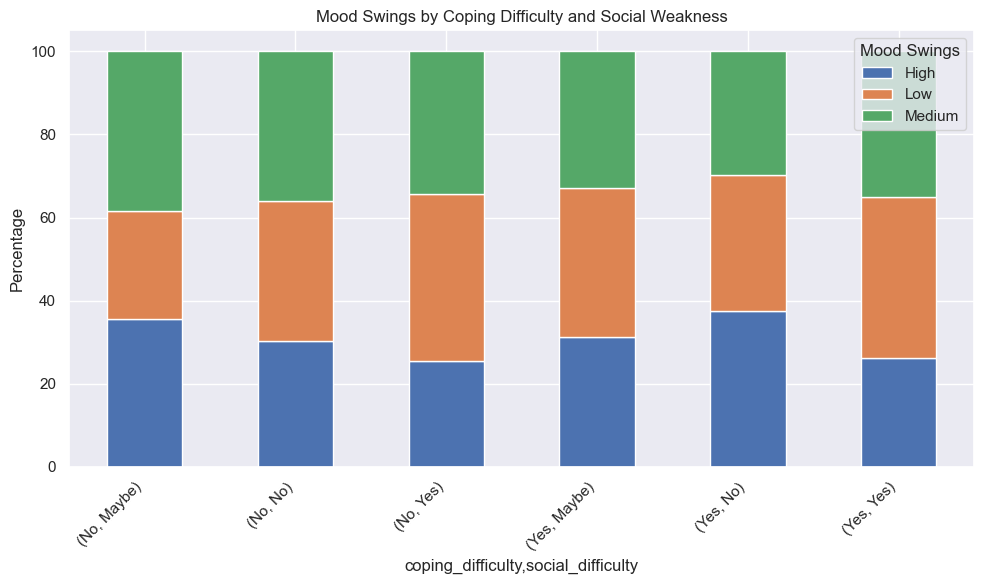

In [28]:
# Create a cross-tab of mood_swings by coping_difficulty and social_difficulty
interaction_table = pd.crosstab(
    index=[data['coping_difficulty'], data['social_difficulty']],
    columns=data['mood_swings'],
    normalize='index'
).mul(100).round(2)

print("=== Mood Swings by Coping Difficulty and Social Difficulty ===")
print(interaction_table)

# Optional visualization: stacked bar plot
interaction_table.plot(
    kind='bar', stacked=True, figsize=(10,6)
)
plt.ylabel('Percentage')
plt.title('Mood Swings by Coping Difficulty and Social Weakness')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Mood Swings')
plt.tight_layout()
plt.show()


**Interpretation**

The interaction analysis between **mood swings**, **coping difficulty**, and **social weakness** reveals nuanced patterns:

- **Individuals without coping difficulty (`No`):**  
  - Those with social weakness “Yes” show higher proportions of **Low mood swings** (40.32%) and lower **High mood swings** (25.38%), suggesting that social challenges may coincide with more stable or subdued mood patterns in otherwise low-coping individuals.  
  - Those with “No” or “Maybe” social weakness display a more balanced distribution across High, Medium, and Low mood swings.

- **Individuals with coping difficulty (`Yes`):**  
  - Those with social weakness “No” exhibit higher **High mood swings** (37.56%) and lower Medium mood swings (29.89%), indicating that coping struggles without social challenges may amplify extreme mood variations.  
  - For “Yes” social weakness, the distribution is slightly shifted toward Low mood swings (38.63%), similar to the pattern seen in non-coping individuals with social difficulty.  

**Overall**, the results suggest that **coping difficulty and social weakness interact in subtle ways to influence mood patterns**:  
- Social weakness tends to **moderate mood swings toward lower intensity** in people without coping difficulty.  
- Among those with coping difficulty, lack of social weakness may correlate with more extreme mood swings.  

These patterns highlight **behavioral subgroups** that could be informative in later clustering or profiling, showing that multiple mental health factors jointly shape individual experiences.

---

### Q10. Demographics and Mental Health Awareness

This analysis investigates how **demographic factors** — specifically **gender, country, and occupation** — influence two key mental health indicators:

1. **Noticed Growing Stress**  
2. **Noticed Habit Changes**

By examining these patterns, we aim to identify whether certain demographic groups are more likely to report stress or behavioral changes, providing insight into population-level differences in mental health experiences.

=== Gender ===
--- noticed_growing_stress ---
noticed_growing_stress  Maybe     No    Yes
gender                                     
Female                  30.16  30.16  39.68
Male                    35.13  32.05  32.82 

--- noticed_habit_changes ---
noticed_habit_changes  Maybe     No    Yes
gender                                    
Female                 32.25  31.09  36.66
Male                   32.56  29.74  37.69 

=== Country ===
--- noticed_growing_stress ---
noticed_growing_stress  Maybe     No    Yes
country                                    
Australia               33.70  31.51  34.79
Belgium                 32.52  31.06  36.42
Bosnia And Herzegovina  35.13  32.05  32.82
Brazil                  35.13  32.05  32.82
Canada                  34.10  31.66  34.24
Colombia                35.13  32.05  32.82
Costa Rica              35.13  32.05  32.82
Croatia                 35.13  32.05  32.82
Czech Republic          35.13  32.05  32.82
Denmark                 35.13  32.05  32.

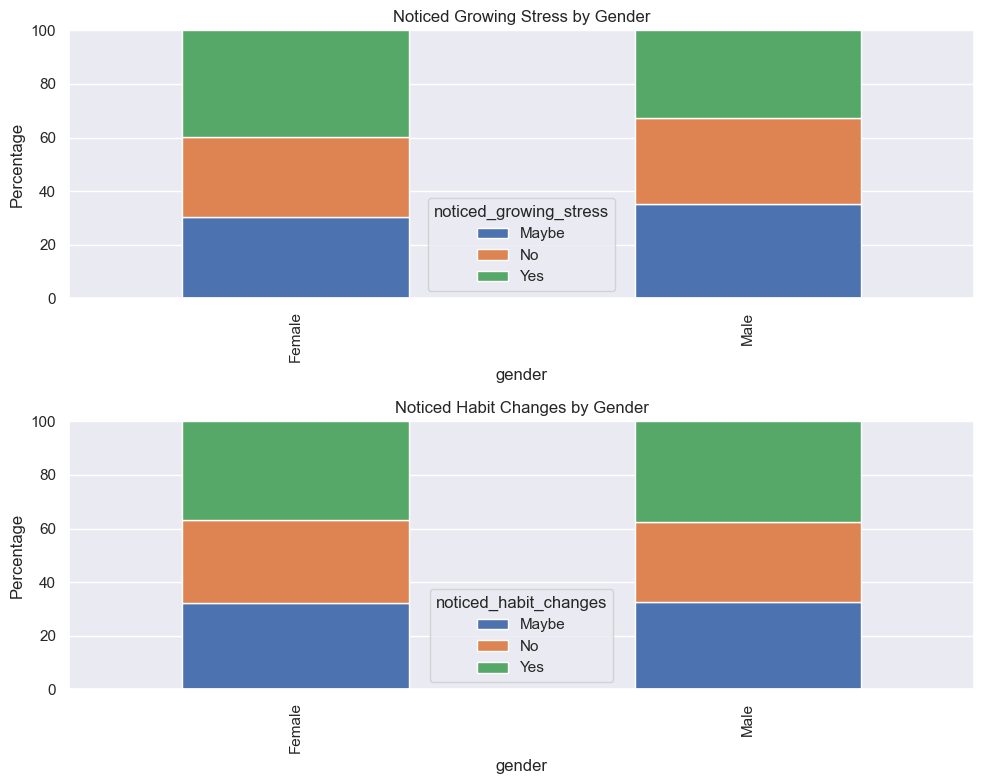

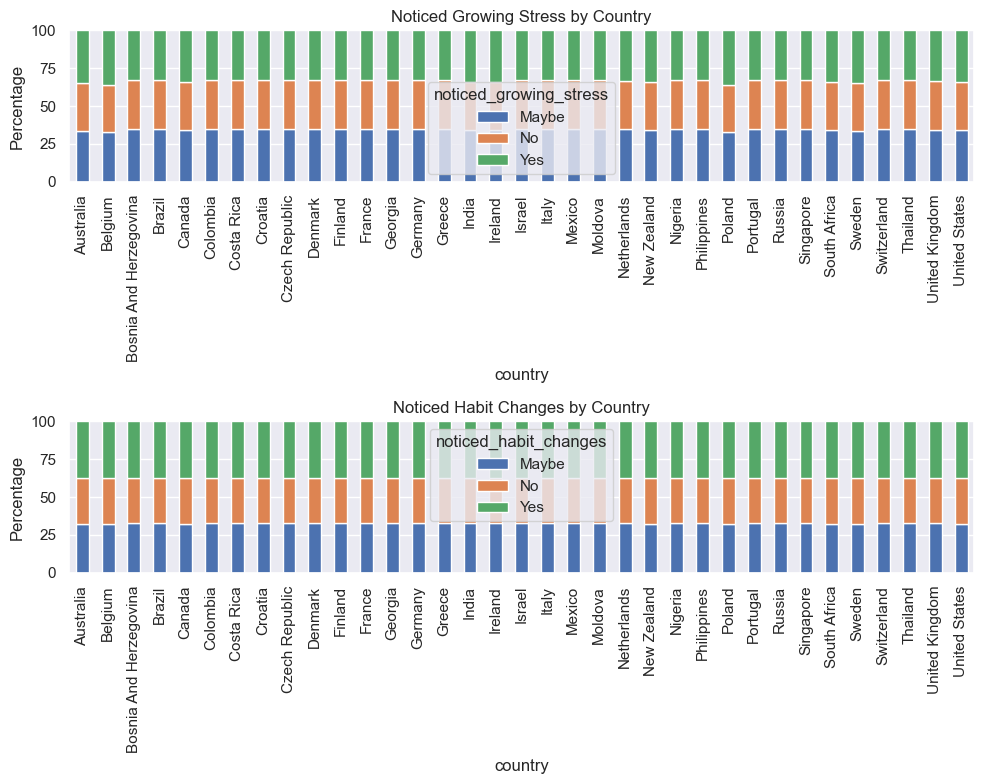

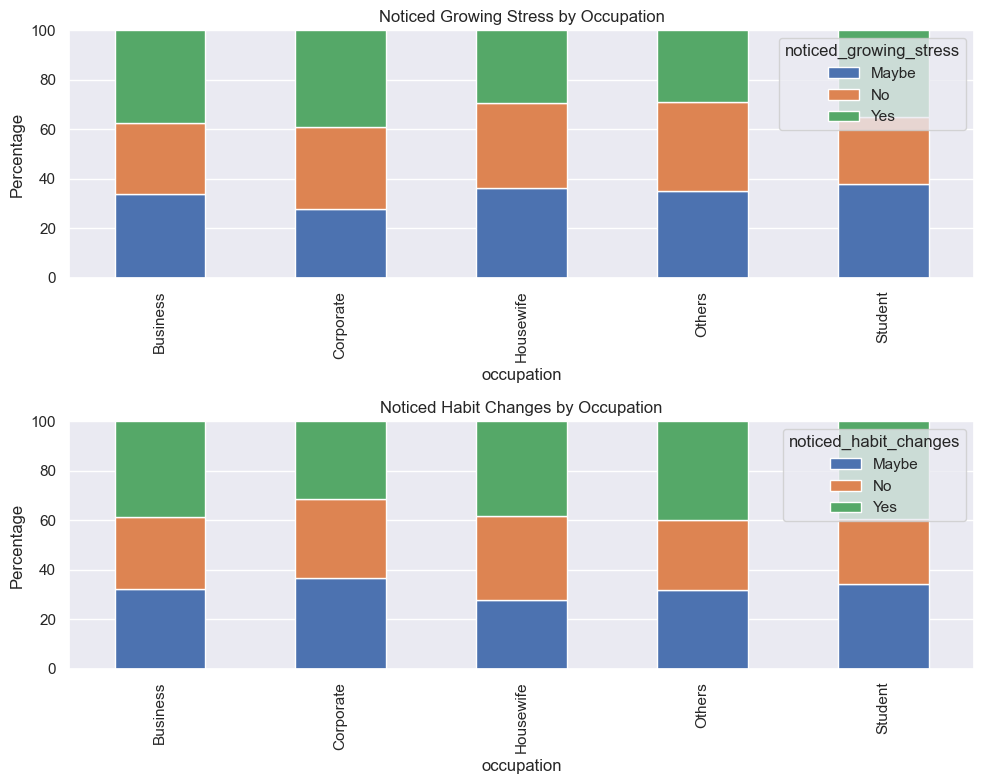

In [30]:
# Features for analysis
demographics = ['gender', 'country', 'occupation']
mh_indicators = ['noticed_growing_stress', 'noticed_habit_changes']

# Iterate over demographic features and compute percentage distributions
for demo in demographics:
    print(f"=== {demo.title()} ===")
    for indicator in mh_indicators:
        pct_table = (
            pd.crosstab(data[demo], data[indicator], normalize='index')
            .mul(100)
            .round(2)
        )
        print(f"--- {indicator} ---")
        print(pct_table, '\n')

# Optional visualization: stacked bar plots for each demographic
for demo in demographics:
    fig, axes = plt.subplots(len(mh_indicators), 1, figsize=(10, 4*len(mh_indicators)))
    for ax, indicator in zip(axes, mh_indicators):
        pct_table = (
            pd.crosstab(data[demo], data[indicator], normalize='index')
            .mul(100)
        )
        pct_table.plot(kind='bar', stacked=True, ax=ax)
        ax.set_ylabel('Percentage')
        ax.set_title(f'{indicator.replace("_", " ").title()} by {demo.title()}')
        ax.set_ylim(0, 100)
    plt.tight_layout()
    plt.show()

**Interpretation**

The demographic analysis reveals subtle but meaningful patterns in mental health awareness:

**Gender**  
- Females report slightly higher rates of noticing **growing stress** (39.68% Yes) compared to males (32.82% Yes).  
- Habit changes are nearly evenly distributed between genders, with a slight edge for males (37.69% Yes vs 36.66% for females).  

**Country**  
- Differences across countries are generally modest.  
- Some variation exists, for instance, Belgium and Poland show slightly higher reports of stress and habit changes compared to other countries, suggesting localized demographic or cultural effects.  

**Occupation**  
- Students and corporate employees tend to report higher awareness of growing stress (37.79% and 39.15% Yes, respectively).  
- Habit changes vary by occupation: students and “Others” show the highest Yes responses (39.57% and 40.01%, respectively), whereas housewives and corporate employees are more balanced.  

**Overall Insight**  
- Gender and occupation appear to influence the likelihood of noticing stress or habit changes, while country-level differences are subtle.  
- These findings suggest that demographic factors may shape how individuals perceive or report mental health indicators, which could inform targeted awareness programs or interventions.